# Analysis of Racial Equity in San Diego Criminal Justice System

Jiayi Zhao & Sreetama Chowdhury

## Abstract 

The California Racial Justice Act (RJA) approved in 2020 which prohibits state prosecutors from racially discriminating against suspects, prosecutors are not allowed to prosecute suspects as long as they can prove that law enforcement officials discriminated against them; even if a suspect is convicted, a retrial is available. However, the RJA does not mandate the publication of aggregated data on racial disparity allegations, convictions, and sentences, as well as defining acceptable statistical methods to demonstrate racial disparity. This project is a preliminary search to find out what aspects of criminal justice data might be useful to those citing the CRJA. Accordingly, this project aims to seek and disclose data on the racial composition of charges, convictions, and sentences in San Diego County and its municipalities through the submission of Public Records Act (PRA) and Freedom of Information Act (FOIA) requests, as well as data analyzed using the Pandas python library. To some extent, this project will include a precise analysis on the traffic stop reason and resultant charges in San Diego neighborhoods from traffic stop data collected under the Racial and Identity Profiling Act of 2015 (RIPA) to investigate any statistical evidence of racial bias affecting the outcomes of different stop reasons and their resultant charges in different city neighborhoods of San Diego county.

## Table of Contents

1. ### [Background & Prior Work](#intro)
2. ### [Methods](#methods)
3. ### [References](#ref)

## Background & Prior Work <a id='intro'></a>

California Governor Gavin Newsom signed several laws after taking office in 2019 to promote racial equality and justice. Among them, The California Racial Justice Act (AB 2542), proposed by Assemblyman Ash Kalra in the South Bay constituency, was also signed by Newsom in September 2020, which would prohibit the use of race or ethnicity to seek or obtain a conviction or sentence. This new law prohibits state prosecutors from racially discriminating against suspects, prosecutors are not allowed to prosecute suspects as long as they can prove that law enforcement officials discriminated against them; even if a suspect is convicted, a retrial is available.

However, the only public race and ethnicity related data set is the traffic stop data under the Racial and Identity Profiling Act (RIPA) from the San Diego Police Department. There are researchers and journalists utilizing the traffic stop data to analyze whether there exists racial “bias affecting the outcomes of police stops and the resultant charges” [[2](#ref2)]. Both of the prior works by Greg Moran, et al and Sreetama Chowdhury conclude that there is no statistically significant evidence of bias. However, richer & whiter neighborhoods have lower stop rates than equivalent sized poorer & browner neighborhoods [[1](#ref1)]. 

The goal of this research is to extend both prior works that update the traffic stop database that Chowdhury constructed and seek for a more precise analysis on the traffic stop reason and resultant charges in San Diego neighborhoods to investigate whether the disproportionate stop rate among races will lead to a disproportionate arrest and citation rate. In addition, this project aims to seek and disclose more data on the racial composition of charges, convictions, and sentences in San Diego County and its municipalities through the submission of Public Records Act (PRA) and Freedom of Information Act (FOIA) requests, as well as data analyzed using the Pandas python library.

## Methods <a id='methods'></a>

All data used can be found & downloaded [here](https://data.sandiego.gov/datasets/police-ripa-stops/) and on linked pages.

In [ ]:
#import + consolidate San Diego RIPA data into one massive df (result_df)

In [1]:
import pandas as pd   
import missingno as msno
import matplotlib.pyplot as plt
from astral import LocationInfo
from astral.geocoder import database, lookup
import seaborn as sns
import datetime
from datetime import date
from astral.sun import sun

In [ ]:
# city = lookup("San Diego", database())

# def convert_dtype_float(x):
#     if not x:
#         return 0
#     try:
#         return float(x)   
#     except:        
#         return 0
    
# def convert_dtype_string(x):
#     if not x:
#         return ''
#     try:
#         return str(x)   
#     except:        
#         return ''
    
# convert_dict = {'date_stop': str}
    
# contraband_evid_df = pd.read_csv("data/ripa_contraband_evid_datasd.csv")                                
# disability_df = pd.read_csv("data/ripa_disability_datasd.csv")
# gender_df = pd.read_csv("data/ripa_gender_datasd.csv", converters = {"gender": convert_dtype_string})
# prop_seize_basis_df = pd.read_csv("data/ripa_prop_seize_basis_datasd.csv", converters = {"basisforpropertyseizure": convert_dtype_string})
# prop_seize_type_df = pd.read_csv("data/ripa_prop_seize_type_datasd.csv", converters = {"type_of_property_seized": convert_dtype_string})
# race_df = pd.read_csv("data/ripa_race_datasd.csv")
# stop_result_df = pd.read_csv("data/ripa_stop_result_datasd.csv")
# stop_reason_df = pd.read_csv("data/ripa_stop_reason_datasd.csv", converters = {"reason_for_stopcode": convert_dtype_float})
# stop_details_df = pd.read_csv("data/ripa_stops_datasd.csv", converters = {"land_mark": convert_dtype_string}) 
# stop_details_df = stop_details_df.astype(convert_dict)
# result_df = pd.merge(contraband_evid_df, disability_df, how="outer", on=["stop_id","pid"])
# result_df = pd.merge(result_df, gender_df, how="outer", on=["stop_id","pid"])
# result_df = pd.merge(result_df, prop_seize_basis_df, how="outer", on=["stop_id","pid"])
# result_df = pd.merge(result_df, prop_seize_type_df, how="outer", on=["stop_id","pid"])
# result_df = pd.merge(result_df, race_df, how="outer", on=["stop_id","pid"])
# result_df = pd.merge(result_df, stop_result_df, how="outer", on=["stop_id","pid"])
# result_df = pd.merge(result_df, stop_reason_df, how="outer", on=["stop_id","pid"])
# result_df = pd.merge(result_df, stop_details_df, how="outer", on=["stop_id","pid"])
# result_df['datetime_stop'] = pd.to_datetime(result_df['date_stop'] + ' ' + result_df['time_stop'])

In [ ]:
# result_df.to_csv('df.csv')

In [2]:
result_df = pd.read_csv('df.csv')

/Users/vikizhao/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (29,33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### PART 1: PRELIMINARY DATA BREAKDOWNS & ANALYSIS

In [ ]:
# missingno package allows for visualization of missing data within result_df

In [ ]:
msno.bar(result_df)

#### Automated Keyword Parsing System

In [51]:
#goal: finding out the racial distribution of stops that were (likely to be) carried out on an unhoused person 
#step 1: filtering out stops that were likely to be unhoused individuals
#create df grouping by resulttext (penal code) to find 
#most common code violations that are potentially homelessness-related

In [52]:
resulttext_dist_df = result_df.groupby(['resulttext'], as_index=False).size()
resulttext_dist_df = resulttext_dist_df.sort_values(['size'], ascending=False)
resulttext_dist_df

,resulttext,size
1495,65002 ZZ - LOCAL ORDINANCE VIOL (I) 65002,41070
529,22450(A) VC - FAIL STOP VEH:XWALK/ETC (I) 54167,17254
76,11364(A) HS - POSS UNLAW PARAPHERNALIA (M) 35423,14940
509,22350 VC - UNSAFE SPEED:PREVAIL COND (I) 54106,14895
99,11377(A) HS - POSSESS CNTL SUB (M) 35353,11606
...,...,...
822,261.5(C) PC - SEX W/MINOR:SPEC CIRC (M) 36096,1
127,11594 HS - CNTL SUB OFFENDER NOT REG (M) 35145,1
1290,498(B)(2) PC - THFT UTIL SRVS TAMPER MTR (F) 2...,1
1289,498(B)(1) PC - THFT UTIL SRVS DVRT $950+ (F) 2...,1


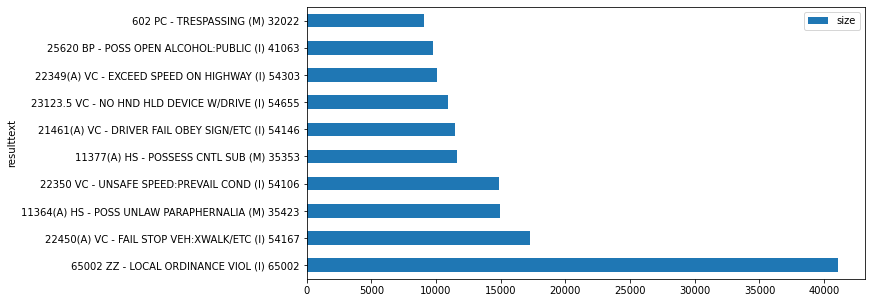

In [53]:
#sample plot of the 10 most common resulttexts 
temp = resulttext_dist_df.head(10)
temp.plot.barh(x="resulttext", y=["size"])
plt.show()

In [54]:
#dumping to excel to manually parse the data
#and search for keywords within the resulttexts that link with probable homelessness
import openpyxl
file_name = 'resulttext.xlsx'
resulttext_dist_df.to_excel(file_name)

In [55]:
result_keyword_bank = ['VIOL', 'POSS', 'TRESPASS', 'VEHICLE', 'LODG', 'ALC', 'CNTL SUB', 'SALE', 
                       'SUSPENDED', 'CONSENT', 'BURGLARY', 'PED', 'ENCR', 'BATTERY', 'NOISE', 'LOI',
                       'THEFT', 'ROBBERY', 'CRT ORDR']
result_keyword_bank

['VIOL',
 'POSS',
 'TRESPASS',
 'VEHICLE',
 'LODG',
 'ALC',
 'CNTL SUB',
 'SALE',
 'SUSPENDED',
 'CONSENT',
 'BURGLARY',
 'PED',
 'ENCR',
 'BATTERY',
 'NOISE',
 'LOI',
 'THEFT',
 'ROBBERY',
 'CRT ORDR']

In [56]:
#create a new df filtering out only those rows which contain the keywords above
pattern = '|'.join(result_keyword_bank)
resulttext_spec_df = resulttext_dist_df[resulttext_dist_df['resulttext'].str.contains(pattern)]

In [57]:
result_x = pd.merge(result_df, resulttext_spec_df, how="inner", on=["resulttext"])

In [58]:
result_x

,stop_id,pid,contraband,disability,gender,basisforpropertyseizure,type_of_property_seized,race,resultkey,result,...,isstudent,perceived_limited_english,perceived_age,perceived_gender,gender_nonconforming,gend,gend_nc,perceived_lgbt,datetime_stop,size
0,2443.0,1.0,None,None,Male,,,White,6.0,Custodial Arrest without warrant,...,0.0,0.0,25.0,Male,0.0,1.0,NaN,No,2018-07-01 00:01:37,8015
1,2449.0,1.0,None,None,Male,,,White,6.0,Custodial Arrest without warrant,...,0.0,0.0,25.0,Male,0.0,1.0,NaN,No,2018-07-01 00:03:00,8015
2,2451.0,1.0,None,None,Male,,,White,6.0,Custodial Arrest without warrant,...,0.0,0.0,22.0,Male,0.0,1.0,NaN,No,2018-07-01 00:24:02,8015
3,2455.0,1.0,None,None,Male,,,Black/African American,6.0,Custodial Arrest without warrant,...,0.0,0.0,28.0,Male,0.0,1.0,NaN,No,2018-07-01 00:11:00,8015
4,2459.0,1.0,None,None,Male,,,Hispanic/Latino/a,6.0,Custodial Arrest without warrant,...,0.0,0.0,25.0,Male,0.0,1.0,NaN,No,2018-07-01 00:42:14,8015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217290,470315.0,1.0,None,None,Male,,,Hispanic/Latino/a,2.0,Warning (verbal or written),...,0.0,0.0,18.0,Male,0.0,1.0,NaN,No,2021-09-04 14:31:21,1
217291,471133.0,1.0,None,None,Male,,,Black/African American,2.0,Warning (verbal or written),...,0.0,0.0,20.0,Male,0.0,1.0,NaN,No,2021-09-06 22:11:28,1
217292,473834.0,1.0,None,None,Male,,,Hispanic/Latino/a,2.0,Warning (verbal or written),...,0.0,0.0,30.0,Male,0.0,1.0,NaN,No,2021-09-15 16:02:44,1
217293,474424.0,1.0,None,None,Male,,,Black/African American,6.0,Custodial Arrest without warrant,...,0.0,0.0,60.0,Male,0.0,1.0,NaN,No,2021-09-17 02:33:00,1


In [59]:
#breaking down + graphing racial distribution of these select set of stops
race_result_x =  result_x.groupby(['race'], as_index=False).size()
race_result_x['proportion'] = race_result_x['size']/race_result_x['size'].sum()

In [60]:
#proportionally, African-Americans make up 20% of these results (vs ~6% of the local population)
#definite disparity
race_result_x

,race,size,proportion
0,Asian,8204,0.037755
1,Black/African American,44194,0.203382
2,Hispanic/Latino/a,57187,0.263177
3,Middle Eastern or South Asian,4503,0.020723
4,Native American,599,0.002757
5,Pacific Islander,2203,0.010138
6,White,100405,0.462068


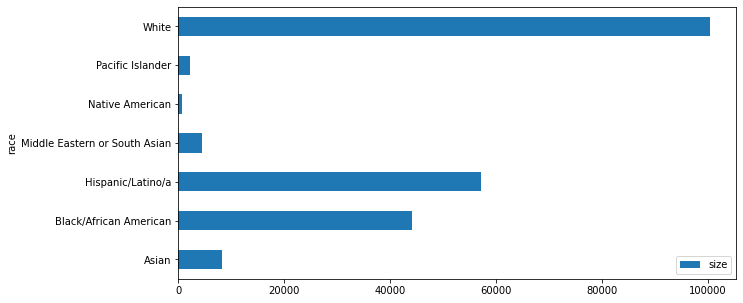

In [61]:
race_result_x.plot.barh(x="race", y=["size"])
plt.show()

In [62]:
#repeating the same process with the reason_for_stop_code_text column
detail_explanation = result_df[['reason_for_stop_code_text', 'reason_for_stop_explanation']]

In [63]:
detail_explanation

,reason_for_stop_code_text,reason_for_stop_explanation
0,647(F) PC - DISORD CONDUCT:ALCOHOL (M) 64005,"staggering, unable to safely walk"
1,22350 VC - UNSAFE SPEED:PREVAIL COND (I) 54106,Speeding
2,415(1) PC - FIGHT IN PUBLIC PLACE (M) 53072,Both parties involved in argument.
3,415(1) PC - FIGHT IN PUBLIC PLACE (M) 53072,Both parties engaged in argument.
4,22350 VC - UNSAFE SPEED:PREVAIL COND (I) 54106,UNSAFE DRIVING
...,...,...
707935,NA - XX AA - COMMUNITY CARETAKING (X) 99990,subject meet 5150 criteria
707936,602 PC - TRESPASSING (M) 32022,subject were camping in p lot
707937,602 PC - TRESPASSING (M) 32022,subject camping in p lot
707938,243(E)(1) PC - BAT:SPOUSE/EX SP/DATE/ETC (M) 1...,subject seen hitting a female in the parking lot


In [64]:
reason_code = result_df.groupby(['reason_for_stop_code_text'], as_index=False).size()
reason_code = reason_code.sort_values(['size'], ascending=False)
reason_code

,reason_for_stop_code_text,size
1762,65002 ZZ - LOCAL ORDINANCE VIOL (I) 65002,42731
1644,602 PC - TRESPASSING (M) 32022,29974
1737,647(E) PC - DIS CON:LODGE W/O CONSENT (M) 32111,27286
639,22350 VC - UNSAFE SPEED:PREVAIL COND (I) 54106,24491
663,22450(A) VC - FAIL STOP VEH:XWALK/ETC (I) 54167,24451
...,...,...
1533,502.6(B) PC - FRAUD:POSS/USE KEENCODER (M) 26574,1
251,14 1.74(B) CA - CA REG:STEELHEAD:W/O CARD (M) ...,1
1200,330B(A) PC - MFG/SELL SLOT MACHINE (M) 39079,1
838,243.6 PC - BATT ON SCHOOL EMP W/INJ (F) 13136,1


In [65]:
reason_code_spec_df = reason_code[reason_code['reason_for_stop_code_text'].str.contains(pattern)]

In [66]:
reason_x = pd.merge(result_df, reason_code_spec_df, how="inner", on=["reason_for_stop_code_text"])

In [67]:
reason_code_spec_df

,reason_for_stop_code_text,size
1762,65002 ZZ - LOCAL ORDINANCE VIOL (I) 65002,42731
1644,602 PC - TRESPASSING (M) 32022,29974
1737,647(E) PC - DIS CON:LODGE W/O CONSENT (M) 32111,27286
1761,65000 ZZ - LOCAL ORDINANCE VIOL (M) 65000,22888
1738,647(F) PC - DISORD CONDUCT:ALCOHOL (M) 64005,13696
...,...,...
119,11371 HS - PRESCRIP VIOL:INDUCE MINR (F) 35185,1
248,136.2(A)(7)(B)2 PC - POSSES F/ARM:VIOL P/ORDER...,1
1149,29815(A) PC - CONV PRSN POSS/ETC F/ARM (F) 52426,1
1198,330.1 PC - MFG/SELL/POSS GAMING DEV (M) 39016,1


In [68]:
reason_x

,stop_id,pid,contraband,disability,gender,basisforpropertyseizure,type_of_property_seized,race,resultkey,result,...,isstudent,perceived_limited_english,perceived_age,perceived_gender,gender_nonconforming,gend,gend_nc,perceived_lgbt,datetime_stop,size
0,2443.0,1.0,None,None,Male,,,White,6.0,Custodial Arrest without warrant,...,0.0,0.0,25.0,Male,0.0,1.0,NaN,No,2018-07-01 00:01:37,13696
1,2451.0,1.0,None,None,Male,,,White,6.0,Custodial Arrest without warrant,...,0.0,0.0,22.0,Male,0.0,1.0,NaN,No,2018-07-01 00:24:02,13696
2,2459.0,1.0,None,None,Male,,,Hispanic/Latino/a,6.0,Custodial Arrest without warrant,...,0.0,0.0,25.0,Male,0.0,1.0,NaN,No,2018-07-01 00:42:14,13696
3,2483.0,1.0,None,None,Male,,,Hispanic/Latino/a,6.0,Custodial Arrest without warrant,...,0.0,0.0,25.0,Male,0.0,1.0,NaN,No,2018-07-01 03:06:50,13696
4,2487.0,1.0,None,None,Male,,,White,7.0,Field interview card completed,...,0.0,0.0,25.0,Male,0.0,1.0,NaN,No,2018-07-01 03:15:12,13696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290785,469650.0,1.0,None,None,Male,,,White,7.0,Field interview card completed,...,0.0,0.0,35.0,Male,0.0,1.0,NaN,No,2021-09-02 21:11:27,2
290786,469650.0,2.0,None,None,Male,,,White,7.0,Field interview card completed,...,0.0,0.0,35.0,Male,0.0,1.0,NaN,No,2021-09-02 21:11:27,2
290787,470315.0,1.0,None,None,Male,,,Hispanic/Latino/a,2.0,Warning (verbal or written),...,0.0,0.0,18.0,Male,0.0,1.0,NaN,No,2021-09-04 14:31:21,1
290788,475243.0,1.0,None,None,Female,,,Hispanic/Latino/a,6.0,Custodial Arrest without warrant,...,0.0,0.0,30.0,Female,0.0,2.0,NaN,No,2021-09-20 05:58:11,1


In [69]:
file_name = 'reason_code.xlsx'
reason_x.to_excel(file_name, columns = ['reason_for_stop_detail', 'reason_for_stop_explanation'])

In [70]:
#creating a dictionary of the most frequent words used in reason_for_stop_explanation for easy filtering of
#probable homelessness-related keywords
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
reason_x = reason_x.replace(np.nan, '') 
explanation_list = reason_x['reason_for_stop_explanation'].tolist()
cv = CountVectorizer()
cv_fit = cv.fit_transform(explanation_list)
word_list = cv.get_feature_names_out()
count_list = cv_fit.toarray().sum(axis=0)

In [71]:
count_dict = {'col_1':word_list, 'col_2':count_list}
count_dict

{'col_1': array(['00', '000', '0000', ..., 'zshelter', 'zwhich', 'zz'], dtype=object),
 'col_2': array([84,  5,  1, ...,  3,  1, 11])}

In [72]:
count_dict_df = pd.DataFrame.from_dict(count_dict)

In [73]:
count_dict_df.head(40)

,col_1,col_2
0,00,84
1,000,5
2,0000,1
3,0005,1
4,0010,2
5,00137f,1
6,0017hrs,1
7,002,2
8,0030,1
9,0040,1


In [74]:
count_dict_df = count_dict_df.sort_values(['col_2'], ascending=False)

In [75]:
file_name = 'probable_unhoused.xlsx'
count_dict_df.to_excel(file_name)

In [76]:
#as previously, manually parse through the data to create a word bank of likely keywords
explanation_word_bank = ['sidewalk', 'sleep', 'encro', 'tres', 'park', 'loit', 'tent', 'block',
                        'influence', 'narc', 'camp', 'refus', 'sit', 'disturbance', 'welfare', 
                        'control', 'habit', 'illegal', 'resid', 'cart', 'shop', 'transient',
                        'yell', 'loud', 'casing', 'overnight', 'tamper', 'lay', 'burgl', 'theft', 'assault'
                        , 'rob']


In [77]:
pattern2 = '|'.join(explanation_word_bank)

explanation_df = reason_x[reason_x['reason_for_stop_explanation'].str.contains(pattern2)]

In [78]:
explanation_df

,stop_id,pid,contraband,disability,gender,basisforpropertyseizure,type_of_property_seized,race,resultkey,result,...,isstudent,perceived_limited_english,perceived_age,perceived_gender,gender_nonconforming,gend,gend_nc,perceived_lgbt,datetime_stop,size
3,2483.0,1.0,None,None,Male,,,Hispanic/Latino/a,6.0,Custodial Arrest without warrant,...,0.0,0.0,25.0,Male,0.0,1.0,,No,2018-07-01 03:06:50,13696
22,2974.0,1.0,None,None,Male,,,Hispanic/Latino/a,1.0,No Action,...,0.0,0.0,45.0,Male,0.0,1.0,,No,2018-07-01 22:39:42,13696
26,3001.0,1.0,None,None,Female,,,White,1.0,No Action,...,0.0,0.0,28.0,Female,0.0,2.0,,No,2018-07-01 23:38:35,13696
31,3047.0,1.0,None,None,Male,,,Hispanic/Latino/a,1.0,No Action,...,0.0,0.0,50.0,Male,0.0,1.0,,No,2018-07-02 04:59:08,13696
34,3121.0,1.0,None,None,Male,,,Hispanic/Latino/a,1.0,No Action,...,0.0,0.0,30.0,Male,0.0,1.0,,Yes,2018-07-02 11:02:30,13696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290724,422456.0,1.0,None,None,Male,,,White,2.0,Warning (verbal or written),...,0.0,0.0,55.0,Male,0.0,1.0,,No,2021-04-07 01:48:00,2
290725,422456.0,1.0,None,None,Male,,,White,7.0,Field interview card completed,...,0.0,0.0,55.0,Male,0.0,1.0,,No,2021-04-07 01:48:00,2
290757,429622.0,1.0,None,None,Female,,,Hispanic/Latino/a,1.0,No Action,...,0.0,0.0,26.0,Female,0.0,2.0,,No,2021-04-29 22:52:49,1
290772,446876.0,1.0,Drug Paraphernalia,None,Male,,,Black/African American,3.0,Citation for infraction,...,0.0,0.0,30.0,Male,0.0,1.0,,No,2021-06-21 20:11:51,1


In [79]:
explanation_race_df = explanation_df.groupby('race', as_index = False).size()

In [80]:
explanation_race_df
explanation_race_df['proportion'] = explanation_race_df['size']/explanation_race_df['size'].sum()

In [81]:
#exploring racial distribution of this new df containing only those entries with relevant keywords
#again, African-Americans consist of 23% of this group (vs ~6% local population)
explanation_race_df

,race,size,proportion
0,Asian,1928,0.020333
1,Black/African American,22477,0.237047
2,Hispanic/Latino/a,21405,0.225741
3,Middle Eastern or South Asian,864,0.009112
4,Native American,344,0.003628
5,Pacific Islander,723,0.007625
6,White,47080,0.496514


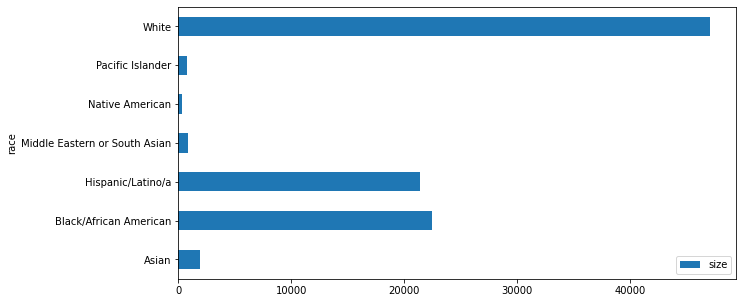

In [82]:
explanation_race_df.plot.barh(x="race", y=["size"])
plt.show()

In [83]:
#finding the distribution of results of stops for the group that is probably unhoused
result_common = result_x.groupby('result', as_index = False).size()
print(result_common)

                             result   size
0           Citation for infraction  55074
1  Custodial Arrest without warrant  95317
2         In-field cite and release  28973
3       Warning (verbal or written)  37931


## still WIP (beats)

In [88]:
beat_df = result_df.groupby(['beat', 'beat_name'], as_index = False).size()
beat_df = beat_df.sort_values(['size'], ascending=False)
beat_df

,beat,beat_name,size
60,521.0,East Village 521,51880
7,122.0,Pacific Beach 122,40791
71,611.0,Midway District 611,29936
24,313.0,Kearney Mesa 313,18005
97,813.0,North Park 813,17937
...,...,...,...
10,125.0,La Jolla Village 125,146
20,245.0,Rancho Encantada 245,137
96,812.0,Burlingame 812,125
125,999.0,OUT OF COUNTY 999,102


#### Geo-Location

In [ ]:
# construct a column of the full address of stops

In [3]:
t = result_df[['intersection','address_block', 'land_mark', 'address_street', 'address_city']]
t['address_block'] = t['address_block'].astype('Int64').astype(str)
t = t.astype(str).replace('<NA>', '').replace('nan', '')
t['full_address'] = t.apply(lambda x: ' '.join(x), axis=1)

<ipython-input-3-f4bfacd512a9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t['address_block'] = t['address_block'].astype('Int64').astype(str)


In [5]:
# apply geocode to convert the full address into coordinates

In [6]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(timeout=10, user_agent = "myGeolocator")
t['geocodes'] = t['full_address'].head(5).apply(geolocator.geocode, country_codes='usa')

t['lat'] = t['geocodes'].head(5).apply(lambda x: x.latitude if x else None)
t['lon'] = t['geocodes'].head(5).apply(lambda x: x.longitude if x else None)

In [7]:
t = t.head(5)
t

,intersection,address_block,land_mark,address_street,address_city,full_address,geocodes,lat,lon
0,,700,,Grand Avenue,SAN DIEGO,700 Grand Avenue SAN DIEGO,"(700, Grand Avenue, Mission Beach, San Diego, ...",32.794545,-117.255888
1,I-5,,,NOBEL DRIVE,SAN DIEGO,I-5 NOBEL DRIVE SAN DIEGO,"(Nobel Drive, La Jolla Colony, University City...",32.868219,-117.220656
2,,4400,,59th Street,SAN DIEGO,4400 59th Street SAN DIEGO,"(4400, 59th Street, El Cerrito Heights, San Di...",32.758321,-117.070370
3,,4400,,59th Street,SAN DIEGO,4400 59th Street SAN DIEGO,"(4400, 59th Street, El Cerrito Heights, San Di...",32.758321,-117.070370
4,,4800,,NIAGARA AVE,SAN DIEGO,4800 NIAGARA AVE SAN DIEGO,"(4800, Niagara Avenue, Ocean Beach, San Diego,...",32.744019,-117.248383


In [8]:
encamp = ["2500 Sports Arena Blvd San Diego", "2600 Sports Arena Blvd San Diego", "2700 Sports Arena Blvd San Diego",
         "16th street San Diego", "17th street San Diego", "Imperial street San Diego",
          "Market street San Diego", "G street San Diego"]

dest = []
for x in encamp:
    lat = geolocator.geocode(x).latitude
    lon = geolocator.geocode(x).longitude
    dest.append([lon, lat])

dest

[[-117.197842, 32.747106],
 [-117.198277, 32.747372],
 [-117.2218506, 32.7563492],
 [-117.1494912, 32.7173509],
 [-117.148547, 32.7065843],
 [-117.1141481936995, 32.5640853],
 [-117.1500023, 32.7115382],
 [-117.1458286, 32.7126201]]

In [9]:
from route import *

df = t
for i in range(len(encamp)):
    df = commute_time(df, str(i), dest[i], 'foot-walking')

/Users/vikizhao/Downloads/route.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result["To_{}_dist(km)".format(dest_name)] = dist
/Users/vikizhao/Downloads/route.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result["To_{}_time(min)".format(dest_name)] = [x / 60 for x in time]


In [10]:
df

,intersection,address_block,land_mark,address_street,address_city,full_address,geocodes,lat,lon,To_0_dist(km),...,To_3_dist(km),To_3_time(min),To_4_dist(km),To_4_time(min),To_5_dist(km),To_5_time(min),To_6_dist(km),To_6_time(min),To_7_dist(km),To_7_time(min)
0,,700,,Grand Avenue,SAN DIEGO,700 Grand Avenue SAN DIEGO,"(700, Grand Avenue, Mission Beach, San Diego, ...",32.794545,-117.255888,9.07,...,18.08,216.986667,19.05,228.625333,37.29,439.342333,18.69,224.220333,19.20,230.447167
1,I-5,,,NOBEL DRIVE,SAN DIEGO,I-5 NOBEL DRIVE SAN DIEGO,"(Nobel Drive, La Jolla Colony, University City...",32.868219,-117.220656,17.34,...,22.59,271.117333,23.83,285.941500,43.93,518.976500,23.15,277.758500,23.91,286.889833
2,,4400,,59th Street,SAN DIEGO,4400 59th Street SAN DIEGO,"(4400, 59th Street, El Cerrito Heights, San Di...",32.758321,-117.070370,14.30,...,11.75,141.052167,12.83,153.948333,28.63,343.521000,12.52,150.182000,11.91,142.882833
3,,4400,,59th Street,SAN DIEGO,4400 59th Street SAN DIEGO,"(4400, 59th Street, El Cerrito Heights, San Di...",32.758321,-117.070370,14.30,...,11.75,141.052167,12.83,153.948333,28.63,343.521000,12.52,150.182000,11.91,142.882833
4,,4800,,NIAGARA AVE,SAN DIEGO,4800 NIAGARA AVE SAN DIEGO,"(4800, Niagara Avenue, Ocean Beach, San Diego,...",32.744019,-117.248383,6.02,...,12.10,145.227000,13.07,156.865500,31.31,367.582667,12.71,152.460667,13.22,158.687333


## References<a id='ref'></a>

1. <a id='ref1'></a> “Stopped by police in San Diego? A lot depends on where you live, drive”:https://www.sandiegouniontribune.com/news/watchdog/story/2022-01-16/stopped-by-police-in-san-diego-a-lot-depends-on-where-you-live-drive by Greg Moran, Lyndsay Winkley, Lauryn Schroeder, Cristina Byvik, and Michelle Gilchrist

2. <a id='ref2'></a>“The California Racial Justice Act & San Diego PD RIPA Data”:https://github.com/FleischerResearchLab/CRJA-analysis/blob/main/src/CRJA%20%2B%20SDPD%20Ripa%20Data.ipynb by Sreetama Chowdhury